In [ ]:
import os
import json

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
stop_words = stopwords.words('german')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\morit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
documents = []
documents_captions = []
documents_comments = []

for file in os.listdir('comments_json_anonym'):
    text = ""
    text_comments = ""
    text_caption = ""
    with open('comments_json/'+file.split('_comments')[0]+'.txt','r',encoding='utf-8') as f:
        text = f.read()
    text_caption = text

    text += '\n'
    with open('comments_json_anonym/'+file,'r',encoding='utf-8') as f:
        data = json.load(f)
    for comment in data:
        text += comment['text']
        text_comments += comment['text']
        if 'answers' in comment:
            for answer in comment['answers']:
                text += answer['text']
                text_comments += answer['text']

    
    words = word_tokenize(text, language="german")
    words_caption = word_tokenize(text_caption, language="german")
    words_comments = word_tokenize(text_comments, language="german")
    

    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_words_caption = [word for word in words_caption if word.lower() not in stop_words]
    filtered_words_comments = [word for word in words_comments if word.lower() not in stop_words]

            
    documents.append(" ".join(filtered_words))
    documents_captions.append(" ".join(filtered_words_caption))
    documents_comments.append(" ".join(filtered_words_comments))



# Topic modeling with LDA for captions and comments combined as documents

In [3]:
# create the CountVectorizer object
vectorizer = CountVectorizer()
# fit the vectorizer to the documents
dtm_combined = vectorizer.fit_transform(documents)

# create the LatentDirichletAllocation object
lda_combined = LatentDirichletAllocation(n_components=6, learning_method='batch')
# fit the lda model to the document-term matrix
lda_matrix = lda_combined.fit_transform(dtm_combined)

# get the feature names (terms)
terms = vectorizer.get_feature_names_out()

# get the topic-term matrix
topic_term_matrix = lda_combined.components_

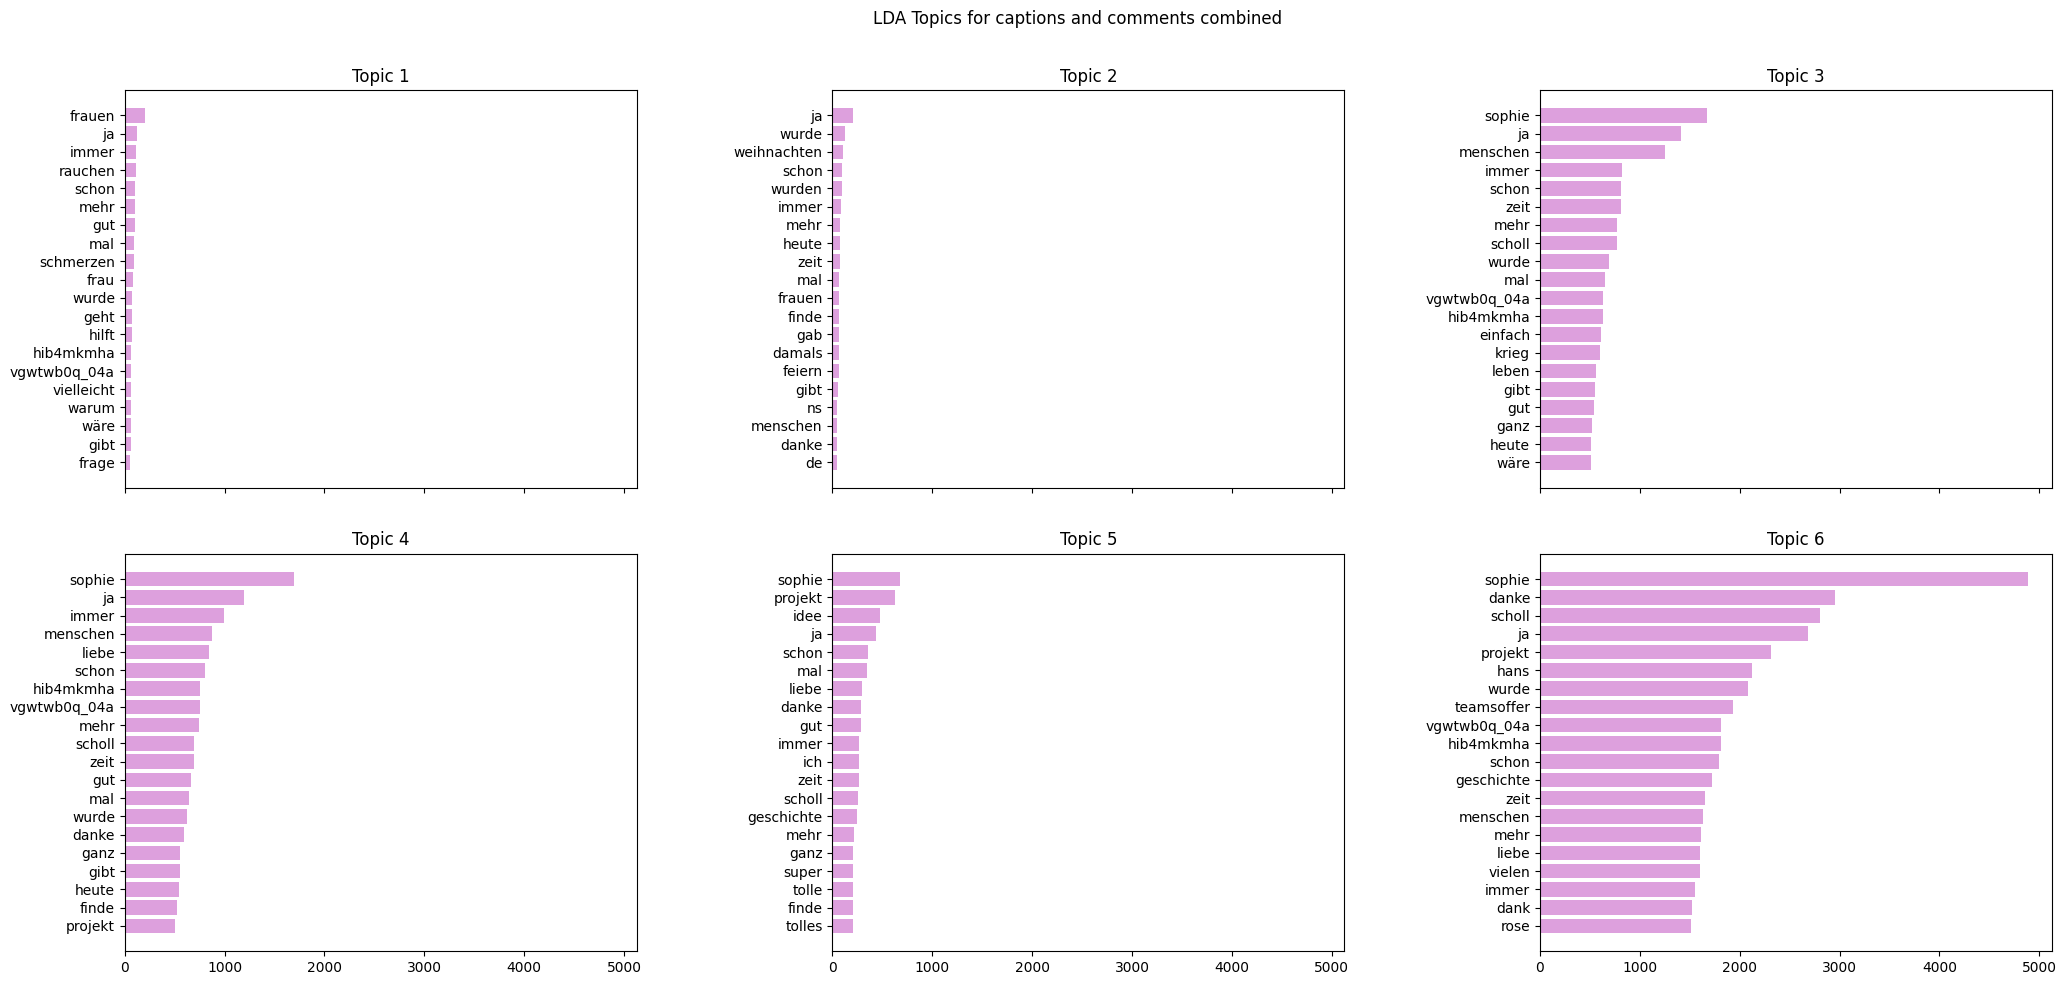

In [4]:


# number of terms to display per topic
N = 20

# create a grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,10),sharex=True)
fig.suptitle("LDA Topics for captions and comments combined")


plt.tight_layout(w_pad=11,h_pad=4)
for topic_index,ax in enumerate([ax for axes in axs for ax in axes]):
    sorted_terms = sorted(zip(terms, topic_term_matrix[topic_index]), key=lambda x: x[1], reverse=True)
    top_terms = [term for term, _ in sorted_terms[:N]]
    score =[score for _, score in sorted_terms[:N]]
    ax.barh(top_terms, score, color="plum",)
    ax.set_title(f'Topic {topic_index+1}')
    ax.invert_yaxis()

fig.subplots_adjust(top=0.90)
plt.show()

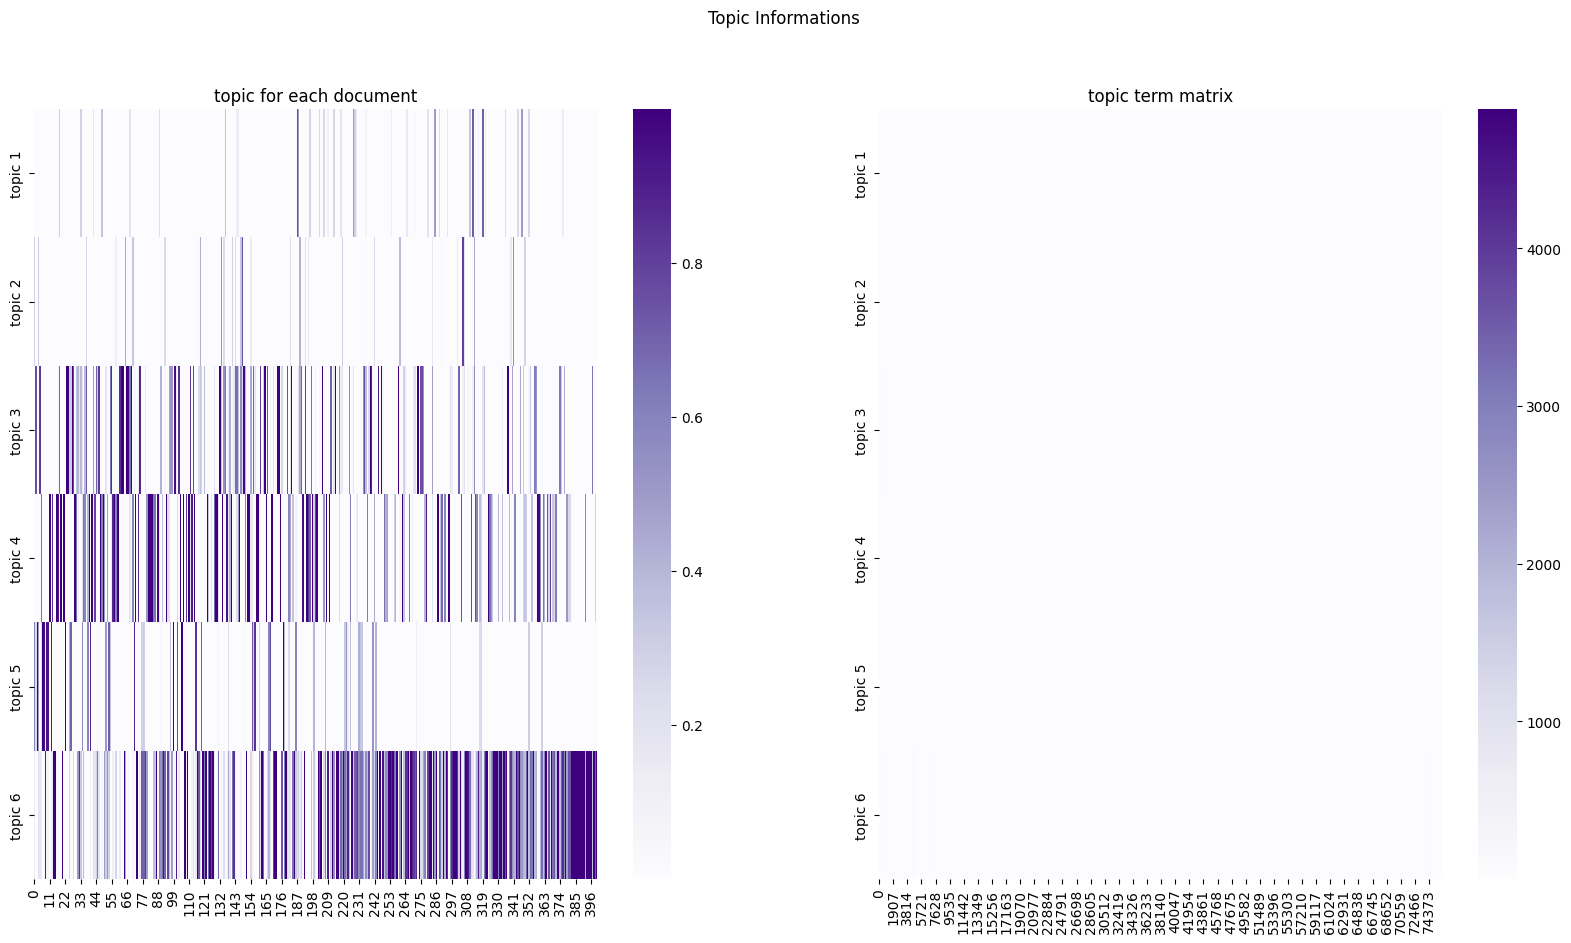

In [5]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
fig.suptitle("Topic Informations")
sns.heatmap(lda_matrix.T, ax=axes[0], cmap='Purples',yticklabels=[f"topic {i+1}" for i in range(len(lda_matrix[0]))])
axes[0].set_title("topic for each document")
sns.heatmap(topic_term_matrix, ax=axes[1], cmap='Purples',yticklabels=[f"topic {i+1}" for i in range(len(lda_matrix[0]))])
axes[1].set_title("topic term matrix")

plt.show()

# Topic modeling with LDA for captions only

In [6]:
# create the CountVectorizer object
vectorizer = CountVectorizer()
# fit the vectorizer to the documents
dtm_captions = vectorizer.fit_transform(documents_captions)

# create the LatentDirichletAllocation object
lda_captions = LatentDirichletAllocation(n_components=6, learning_method='batch')
# fit the lda model to the document-term matrix
lda_matrix = lda_captions.fit_transform(dtm_captions)

# get the feature names (terms)
terms = vectorizer.get_feature_names_out()

# get the topic-term matrix
topic_term_matrix = lda_captions.components_

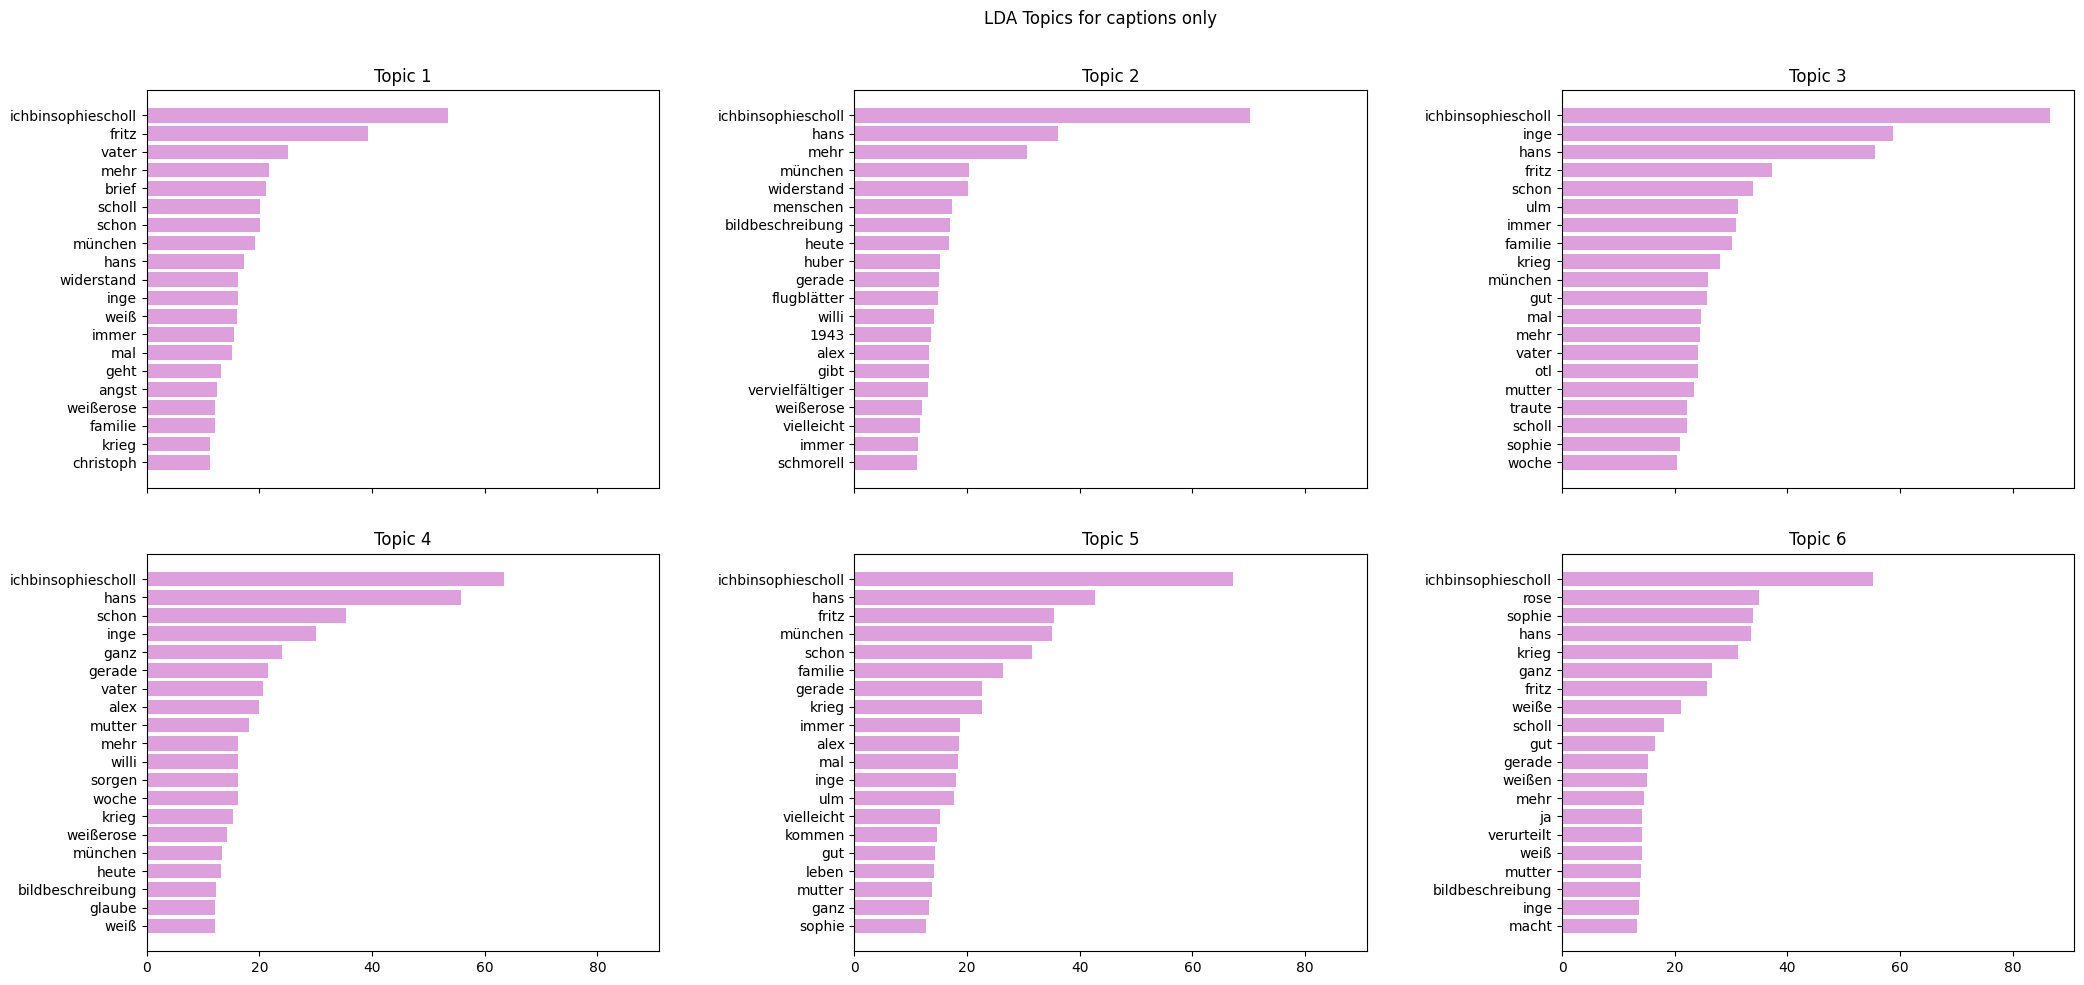

In [7]:

# number of terms to display per topic
N = 20

# create a grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,10),sharex=True)
fig.suptitle("LDA Topics for captions only")
plt.tight_layout(w_pad=11, h_pad=4)
for topic_index,ax in enumerate([ax for axes in axs for ax in axes]):
    sorted_terms = sorted(zip(terms, topic_term_matrix[topic_index]), key=lambda x: x[1], reverse=True)
    top_terms = [term for term, _ in sorted_terms[:N]]
    score =[score for _, score in sorted_terms[:N]]
    ax.barh(top_terms, score, color="plum",)
    ax.set_title(f'Topic {topic_index+1}')
    ax.invert_yaxis()

fig.subplots_adjust(top=0.90)
plt.show()

Text(0.5, 1.0, 'topic term matrix')

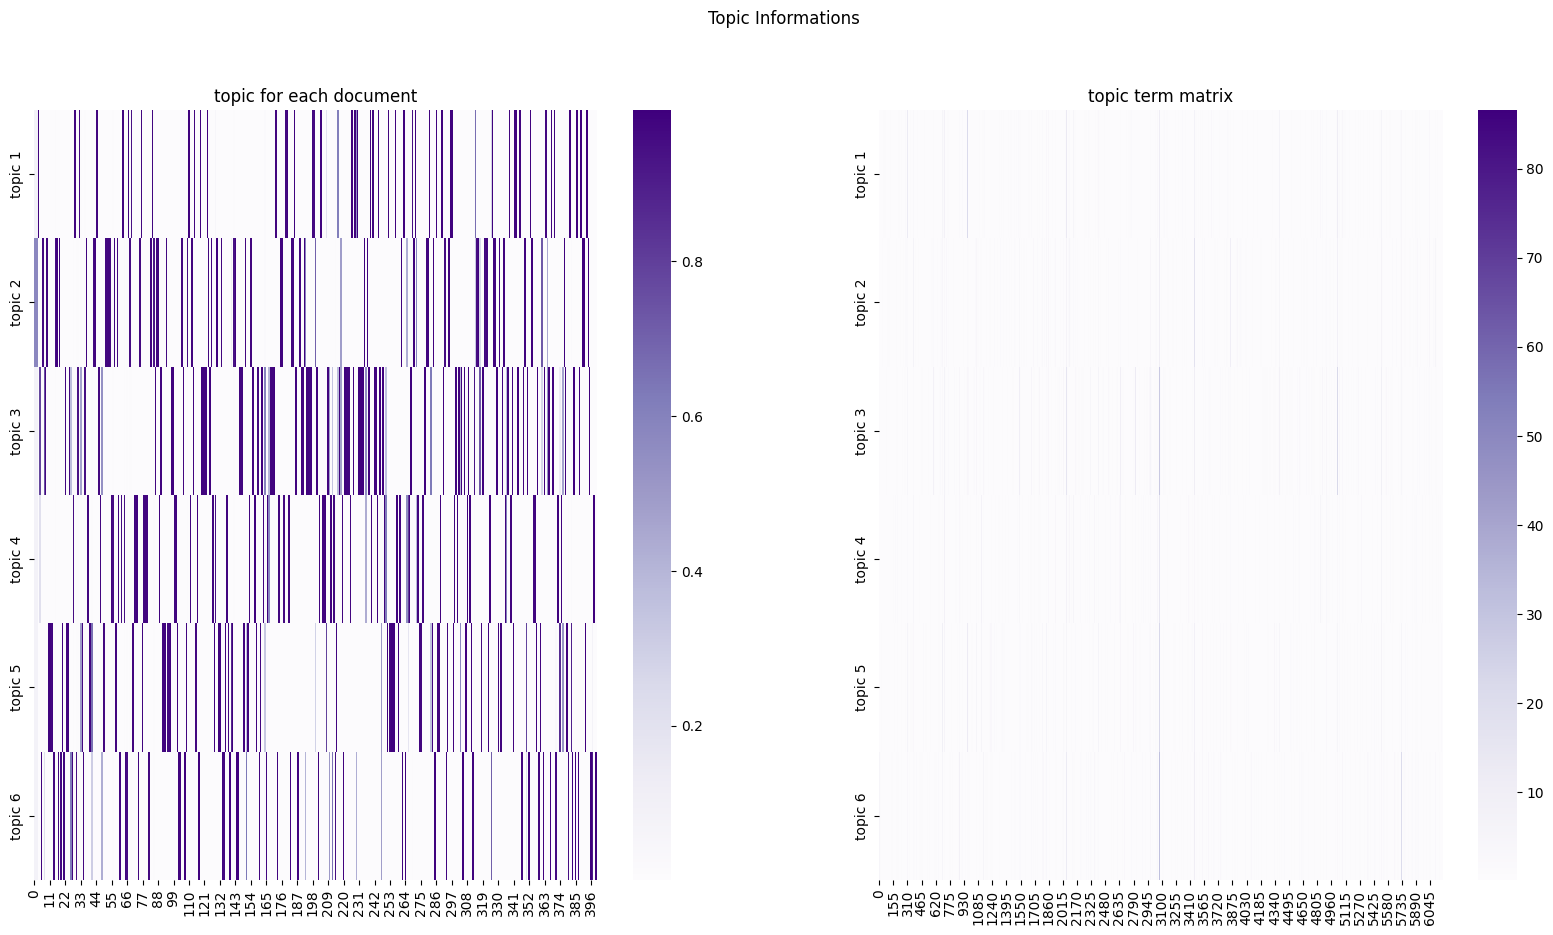

In [8]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
fig.suptitle("Topic Informations")
sns.heatmap(lda_matrix.T, ax=axes[0], cmap='Purples',yticklabels=[f"topic {i+1}" for i in range(len(lda_matrix[0]))])
axes[0].set_title("topic for each document")
sns.heatmap(topic_term_matrix, ax=axes[1], cmap='Purples',yticklabels=[f"topic {i+1}" for i in range(len(lda_matrix[0]))])
axes[1].set_title("topic term matrix")


# Topic modeling with LDA for comments only

In [9]:
# create the CountVectorizer object
vectorizer = CountVectorizer()
# fit the vectorizer to the documents
dtm_comments = vectorizer.fit_transform(documents_comments)

# create the LatentDirichletAllocation object
lda_comments = LatentDirichletAllocation(n_components=6, learning_method='batch')
# fit the lda model to the document-term matrix
lda_matrix = lda_comments.fit_transform(dtm_comments)

# get the feature names (terms)
terms = vectorizer.get_feature_names_out()

# get the topic-term matrix
topic_term_matrix = lda_comments.components_

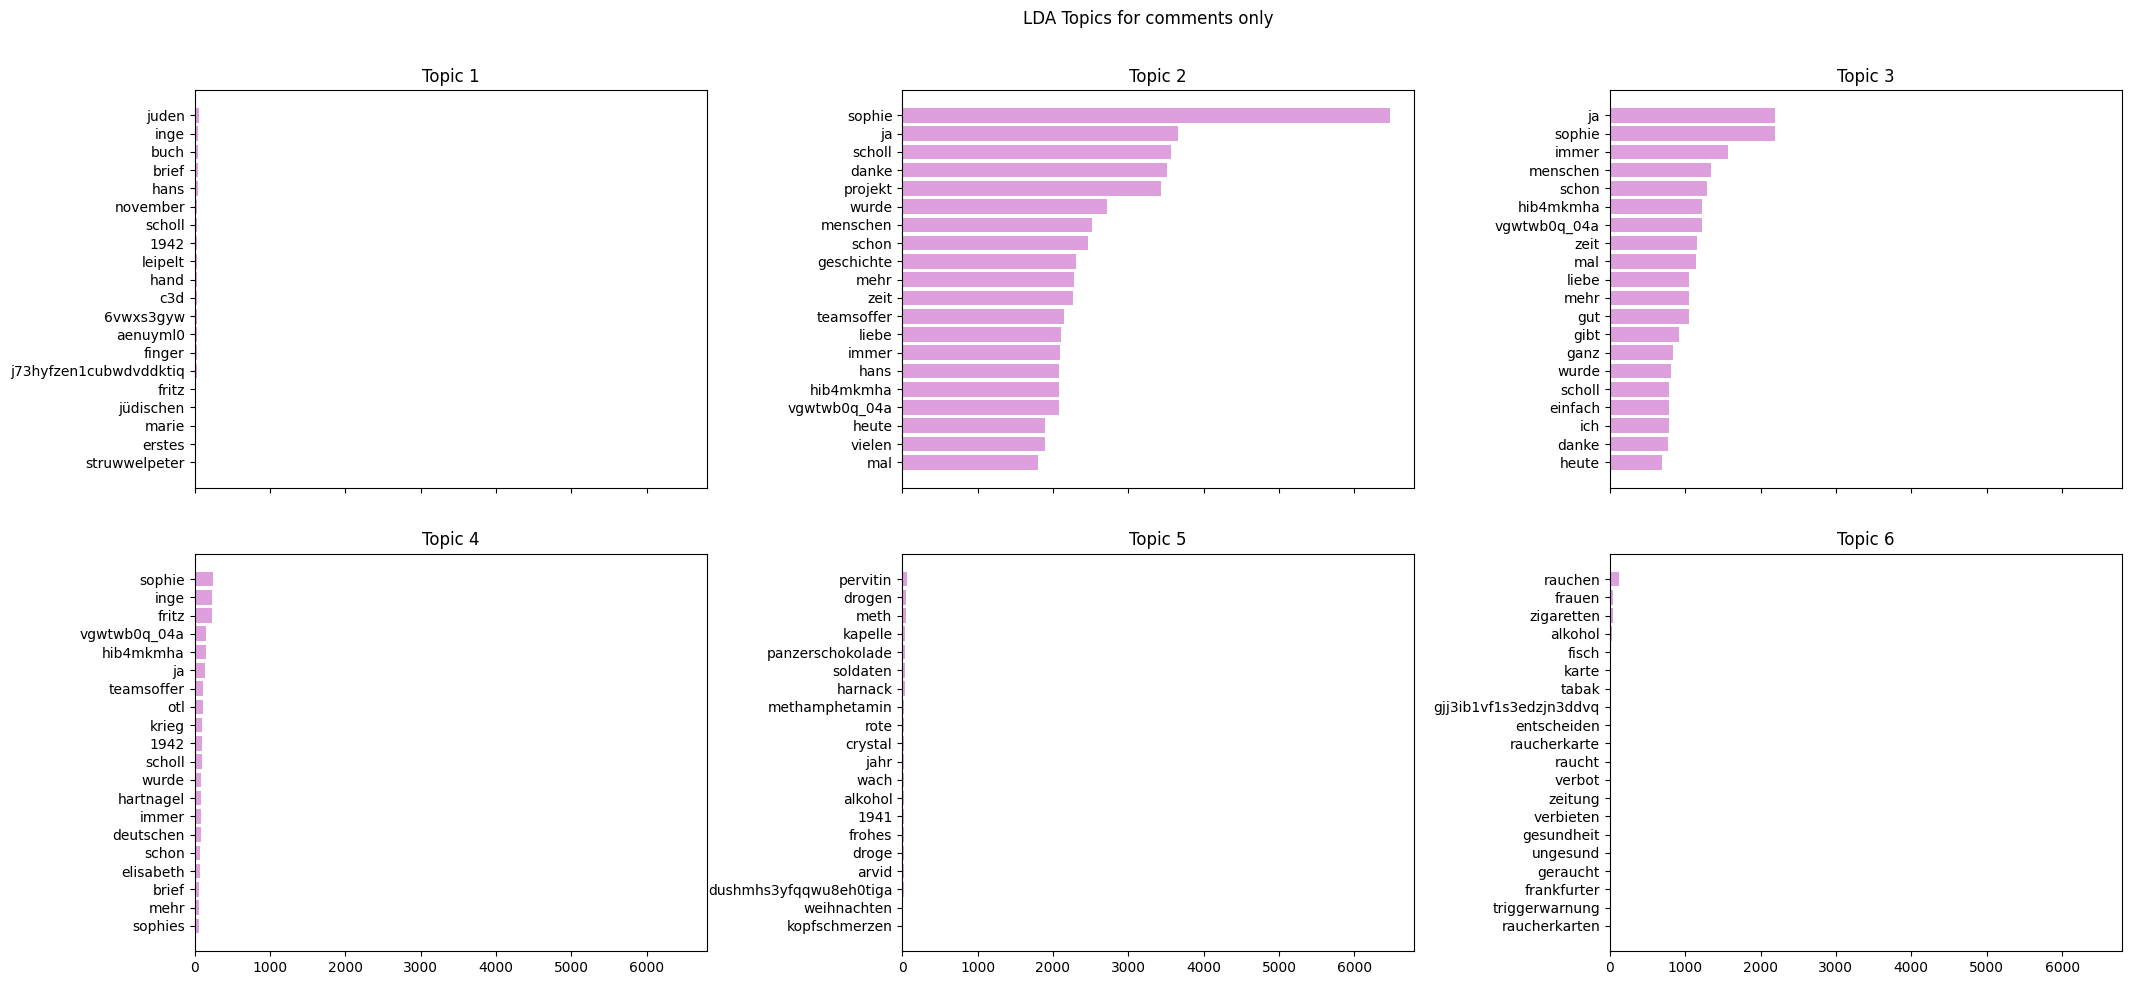

In [10]:

# number of terms to display per topic
N = 20

# create a grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,10),sharex=True)
fig.suptitle("LDA Topics for comments only")
plt.tight_layout(w_pad=11,h_pad=4)
for topic_index,ax in enumerate([ax for axes in axs for ax in axes]):
    sorted_terms = sorted(zip(terms, topic_term_matrix[topic_index]), key=lambda x: x[1], reverse=True)
    top_terms = [term for term, _ in sorted_terms[:N]]
    score =[score for _, score in sorted_terms[:N]]
    ax.barh(top_terms, score, color="plum",)
    ax.set_title(f'Topic {topic_index+1}')
    ax.invert_yaxis()
fig.subplots_adjust(top=0.90)
plt.show()

Text(0.5, 1.0, 'topic term matrix')

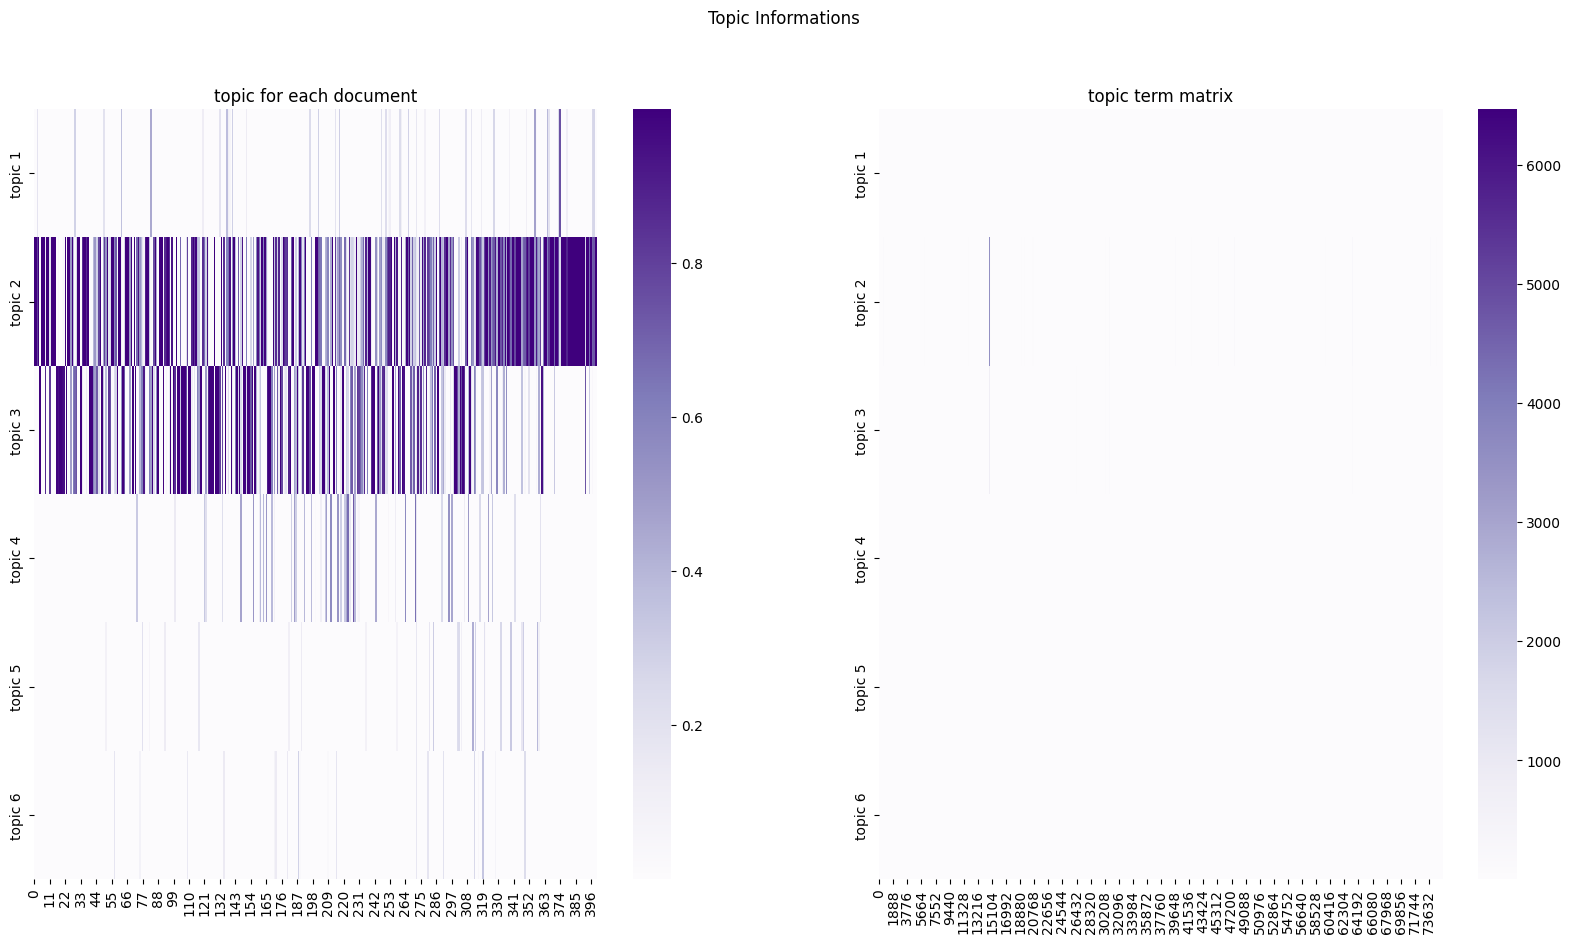

In [11]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
fig.suptitle("Topic Informations")
sns.heatmap(lda_matrix.T, ax=axes[0], cmap='Purples',yticklabels=[f"topic {i+1}" for i in range(len(lda_matrix[0]))])
axes[0].set_title("topic for each document")
sns.heatmap(topic_term_matrix, ax=axes[1], cmap='Purples',yticklabels=[f"topic {i+1}" for i in range(len(lda_matrix[0]))])
axes[1].set_title("topic term matrix")
